## How to use this notebook
Any Jupyter Notebook (JN) is made of "text" (Markdown) and "code" cells. Code cells must be executed to see the result of the program. To run a cell, select it and press Shift + Enter. Using Shift + Enter multiple times will execute consecutive blocks of code one after another, while skipping text cells (executing them does nothing). It is important to run the code cells in the order they appear in the notebook.

A complete version of this JN is available by request to instructors using the book "Exploring mathematics with CAS assistance" for teaching. This version has blank or partially blank code lines that are supposed to be completed by the user before running the code.

Code cells contain (nonexecutable) comments preceded by the pound sign. The comments are of two types:
- a short comment placed on a code line typically states what the result of implementation of the encoded operation is
- a comment placed on a separate line either names the result of the following block of code lines or provides some details only for the next line where a more involved operation is encoded

The code was written by Lydia Novozhilova.

# Lab 14: Modeling relationship between restoring forces and displacements

## Problem formulation
Given lists of $x$-coordinates and $y$-coordinates of data points, make a function that does the following:
- Finds
  - linear fit $y = ax+b,$
  - quadratic fit $y = ax^2+bx+c,$
  - logarithmic fit $y = a\ln(x)+b$
- For each fitting function makes a figure with data points plot and  fitting curve and finds the *residual sum of squares* $R^2$

Test the function on the lists of displacements and corresponding restoring forces provided in Section 10.5.2. Based on the $R^2$ values for the three fitting functions, determine which of these functions is the best fit for the data.



## Brief description of this JN contents
Function **find_fit** takes lists of x- and y-coordinates of data points and a parameter and returns either a fitting polynomial or logarithmic fit depending on the parameter value. The finction also computes and prints $R^2.$

Since by the time of doing this lab, the assumed user has acquired substantial experience in Python coding "from scratch", we included in **find_fit** two new built-in numpy functions. Brief description of the inner workings of these functions is given in the next text cell of this JN.

Function **plot_figure** uses the fitting function constructed by **find_fit** to make the required figure.

In [ ]:
# Loading packages

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Data for testing the functions in this JN

# list of displacements
dpl=[0.01,0.02,0.03,0.05,0.06,0.08,0.10,0.13,0.16,0.18,0.21,0.25,0.28]
# list of corresponding forces
force=[0.21,0.42,0.63,0.83,1.00,1.30,1.50,1.70,1.90,2.10,2.30,2.50,2.70]

## About two numpy built-in functions
1. Numpy function **polyfit(xvals, yvals, n)**. Arguments used here:
- **xvals**: array of x-values
- **yvals**: array of y-values
- **n**: degree of fitting polynomial, integer

The function returns a lot of information, but in this lab we use only *z*, the array of fitting polynomial coefficients, highest power first. (See example from https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html.)
2. Numpy function **poly1d(z)**. The function takes the 1D array of polynomial coefficients **z**, in decreasing powers, and returns the polynomial that can be used for evaluation at an input value of the polynomial argument or at a list of values.

**Comment: Computation of R^2**. Although R-squared is one of the outputs of the function **polyfit(xvals, yvals, n)**, we chose to calculate it  explicitly, from scratch. This reminds the meaning of this important statistical characteristic as a measure that provides information about the goodness of fit of a model.

In [ ]:
# Finding fitting function

def find_fit(x,y,param):
  """
  Args:
    x,y: lists of x- and y-coordinates of data points
    param: if param=1 or 2, linear or quadratic fit must be found
           if param=0, the logarithmic fit must be found
  Output:
    fitting function
  """
  xvals = np.array(x)
  yvals = ? # encode array of y-values
  if param!=0:
    # fill in the blank
    z = np.polyfit(xvals, yvals, ?) # polynomial fit coefficients
    p = np.poly1d(?) # fill in the blank
    print('Fitting polynomial:',p)
    y_predict = p(xvals) # y-values predicted by polynomial model
  else:
    z = np.polyfit(np.log(xvals), yvals, 1) # list [a,b] of coefficients for logarithmic fit
    p = np.poly1d(?) # fill in the blank
    a = np.round(z[0],3)
    b = ? # encode approximation of coefficient b
    print('y = ',a,'ln(x)+',b) # printing logarithmic model
    y_predict = p(?) # encode y-values predicted by logarithmic model
  r2 =((yvals-y_predict)**2).sum()
  print("R^2 =",round(r2,4))
  return p

In [ ]:
# Plotting

def plot_figure(x,y,param):
  # Making list of x-values for plotting
  xmin=min(x)
  xmax=max(x)
  X=np.linspace(xmin, xmax, 50, endpoint=True)

  # Making list yfit of y-values for plotting
  f=find_fit(x,y,param)
  if param==0:
    yfit = f(np.log(X))
    lbl='y=a*ln(x)+b'
  else:
    yfit = f(?) # fill in the blank
    lbl = 'fitting polynomial'

  plt.figure(figsize=(4,3))
  plt.plot(x, y,'bo', label='data points')
  plt.plot(X, yfit, label=lbl,color='red')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(loc='best', fancybox=True, shadow=True)
  plt.show()

Fitting polynomial:  
8.914 x + 0.3988
R^2 = 0.2775


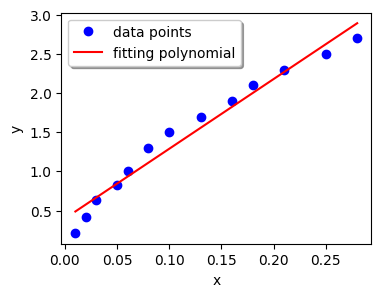

In [ ]:
# Example: linear fit

plot_figure(dpl,force,1)

y =  0.769 ln(x)+ 3.388
R^2 = 0.4377


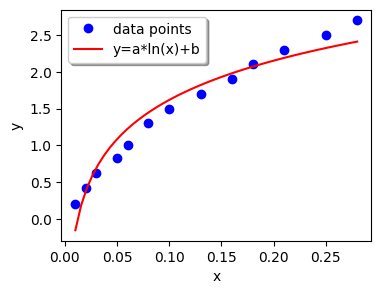

In [ ]:
# Example: logarithmic fit

plot_figure(dpl,force,0)

Fitting polynomial:         2
-21.29 x + 14.82 x + 0.1549
R^2 = 0.0414


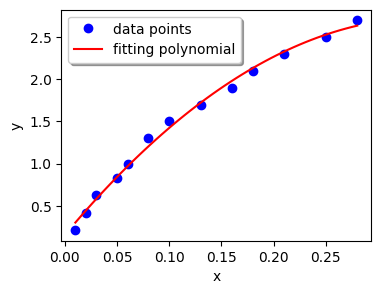

In [ ]:
#Example: quadratic fit

plot_figure(dpl,force,2)